In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd


# Load the graph from the edge list file
G = nx.read_weighted_edgelist('male_graph.edgelist')
print(f"Nodes: {len(G.nodes())}")
pos = nx.spring_layout(G, iterations=50, threshold=0.0001)

# Plot the graph with node colors based on their clusters
plt.figure(figsize=(5, 5))
nx.draw(G, pos, node_size=50)

# Add title and show the plot
plt.title("Graph Partitioned into Communities (Clusters)")
plt.show();

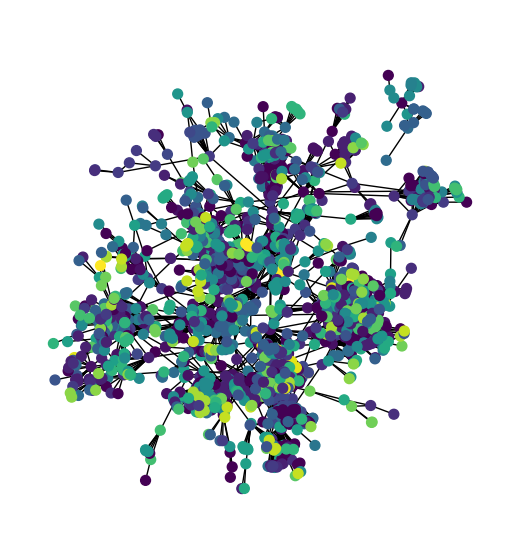

In [40]:
clustering_louvain = pd.read_csv('male_clusters_Leiden.csv')
# Create a dictionary to store node to cluster mapping
node_to_cluster = dict(zip(clustering_louvain['vertex_id'], clustering_louvain['cluster_id']))

# Create a list of colors based on clusters (different color for each cluster)
cluster_colors = [node_to_cluster[int(node)] for node in G.nodes()]

# Create a layout for the graph with more iterations for better positioning
pos = nx.spring_layout(G, iterations=30)  # Increase iterations to improve the layout

# Plot the graph with node colors based on their clusters
plt.figure(figsize=(5, 5))

nx.draw(G, pos, node_size=50, node_color=cluster_colors)

# Add title and show the plot
plt.title("Graph Partitioned into Communities (Clusters)")
plt.show();

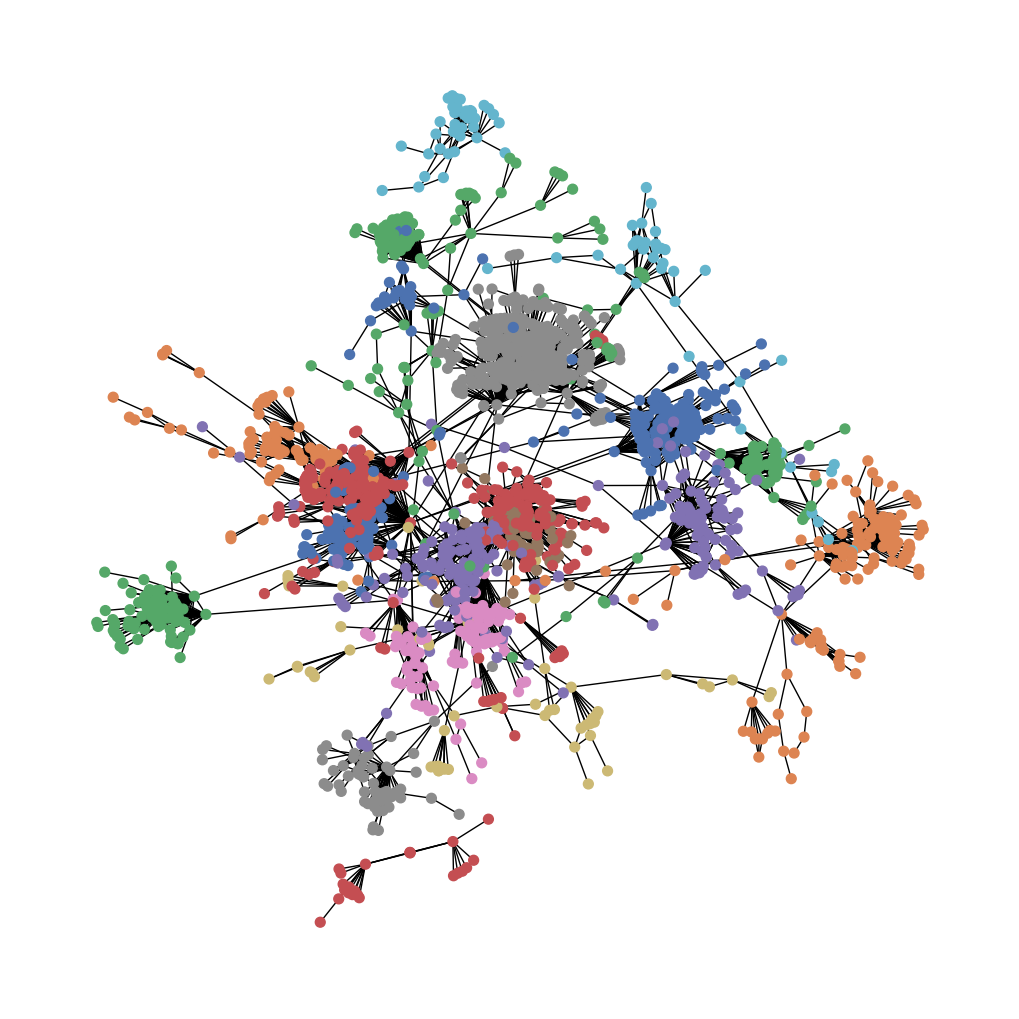

In [46]:
# Load cluster data
clustering_louvain = pd.read_csv('male_clusters_Louvain.csv')

# Create a dictionary to store node-to-cluster mapping
node_to_cluster = dict(zip(clustering_louvain['vertex_id'], clustering_louvain['cluster_id']))

# Get unique clusters and create a colormap
n_unique_clusters = len(sorted(set(node_to_cluster.values())))
colormap = sns.color_palette(palette="deep", n_colors=n_unique_clusters)

# Create a list of colors based on clusters
cluster_colors = [colormap[node_to_cluster[int(node)]] for node in G.nodes()]

# Create a layout for the graph with more iterations for better positioning
pos = nx.spring_layout(G, iterations=30, threshold=0.0001)

# Plot the graph with node colors based on their clusters
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    pos,
    node_size=50,
    node_color=cluster_colors,
    edge_color='black'
)

plt.show()